Student Name: Paul Minogue

Student ID: 21196354

## Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Description of Dataset

The dataset to be analysed contains a Portuguese bank's client background attributes. &ensp; These background attributes are supplemented with attributes recorded from interaction with the client during the previous and current telemarketing campaign, both of which try to get the client to subscribe to a term deposit. &ensp; A *term deposit* is a financial investment for a fixed term, during which time the bank or other institution in which the investment is made will use the money to fund loans or other services, which leads to the value of the investment growing and therefore yielding a greater amount withdrawable by the client once the fixed term ends.

Here is a description of the attributes in the dataset:

#### Input variables

##### bank client data

*age* (numeric)

*job*: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

*marital*: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: *'divorced' means divorced or widowed*)

*education*: (categorical:'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

*default*: has credit in default? (categorical: 'no', 'yes', 'unknown')

*balance*: current acount balance of client (numeric)

*housing*: has housing loan? (categorical: 'no', 'yes', 'unknown')

*loan*: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### related with the last contact of the current campaign

*contact*: contact communication type (categorical: 'cellular','telephone')

*day*: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

*month*: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

*duration*: last contact duration, in seconds (numeric). &ensp; **Important note:** *this attribute highly affects the output target (e.g., if duration=0 then y='no'). &ensp; Yet, the duration is not known before a call is performed. &ensp; Also, after the end of the call y is obviously known. &ensp; Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

##### other attributes

*campaign*: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*pdays*: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*previous*: number of contacts performed before this campaign and for this client (numeric)

*poutcome*: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

#### Output variable

*subscribed* - has the client subscribed to a term deposit? (binary: 'yes', 'no')

## Data import and quick peek

In [18]:
df = pd.read_csv('./bank.csv')

In [19]:
df.head(10)

age            job   marital  education default  balance housing loan  \
0  32.0     technician    single   tertiary      no      392     yes   no   
1  39.0     technician  divorced  secondary      no      688     yes  yes   
2  59.0        retired   married  secondary      no     1035     yes  yes   
3  47.0    blue-collar   married  secondary      no      398     yes  yes   
4  54.0        retired   married  secondary      no     1004     yes   no   
5  46.0  self-employed  divorced   tertiary      no      926     yes   no   
6  34.0    blue-collar   married  secondary      no     1924     yes  yes   
7  45.0       services  divorced  secondary      no      396     yes  yes   
8  58.0     management  divorced   tertiary      no      315     yes   no   
9  49.0     management  divorced   tertiary      no    20727      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   
5  cellular    1   apr       463         1    133         3  failure   
6  cellular    1   apr       161         2    253         1  failure   
7  cellular    1   apr       251         4    329         4  failure   
8  cellular    1   apr       121         2    135         2  failure   
9  cellular    1   apr       285         3    132         2  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no  
5         no  
6         no  
7         no  
8         no  
9         no

In [20]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

*Age* is the only numerical attribute missing some values (12 missing). &ensp; It may be the case that this is considered private information that someone didn't feel like providing.

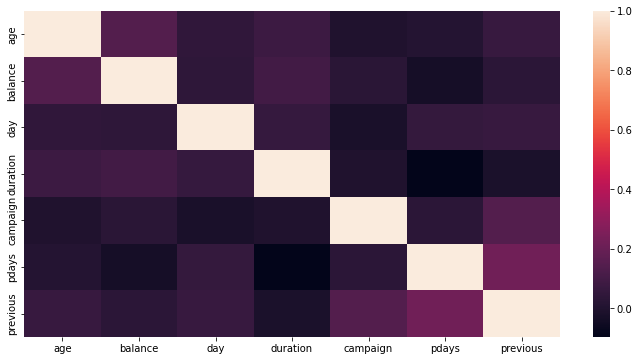

In [21]:
sns.heatmap(df.corr());

There isn't a whole lot of correlation going on here.  *pdays*, the number of days since the person was last contacted from a previous campaign and *previous*, the number of contacts with this person before this campaign, are the only attributes with some correlation. &ensp; Just from the descriptions of these attributes, it seems reasonable there would be some relation between them.

## Question

Another question to ask about this dataset is:

*What attributes best predict how likely a client is to subscribe?*

## Individual attribute overview

To get an overview of each attribute, histograms are plotted for each numerical attribute and bar charts for each categorical attribute. &ensp; Mean and median are printed below each histogram and the most common attribute is printed below the bar charts.

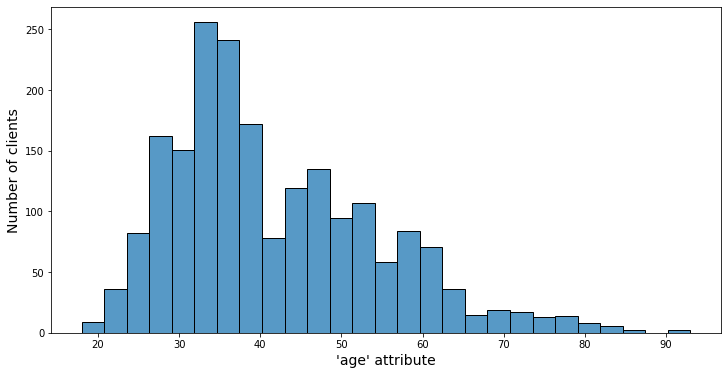

Mean of 'age' attribute:   41.753018108651915
Median of 'age' attribute: 38.0



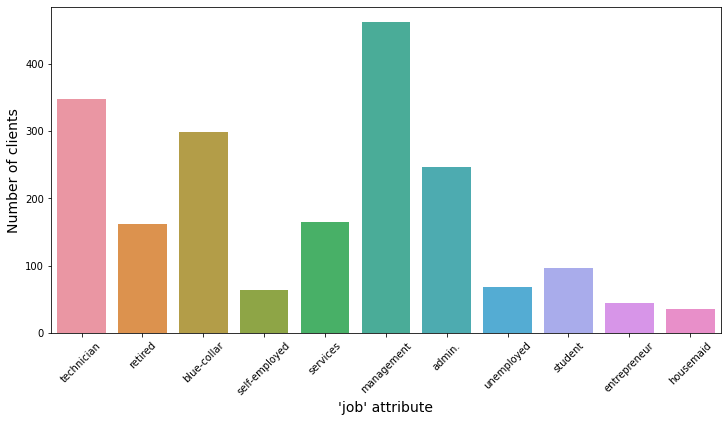

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35

Most common category within 'job' attribute: management



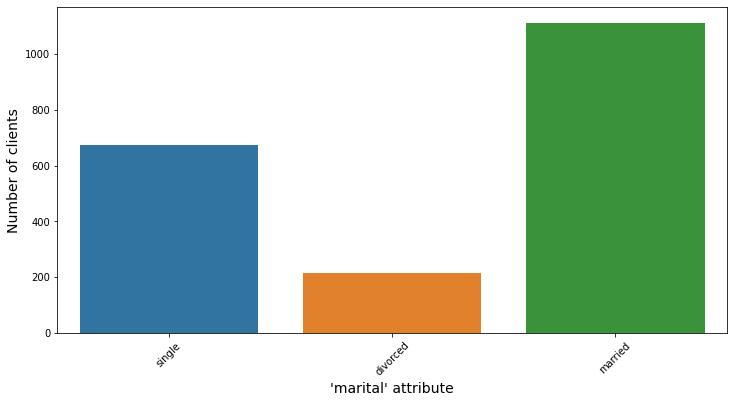

married     1111
single       674
divorced     215

Most common category within 'marital' attribute: married



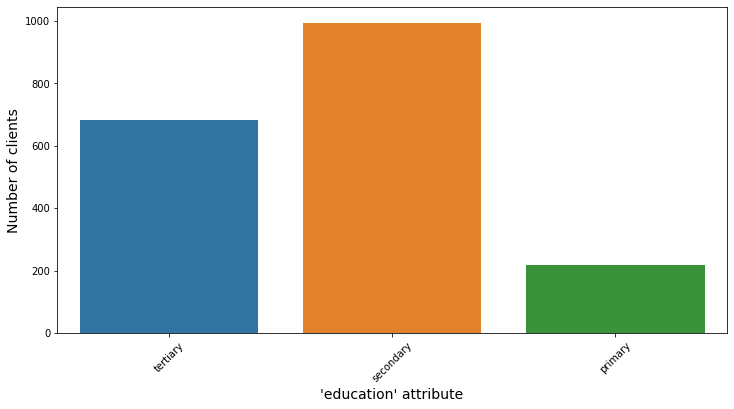

secondary    995
tertiary     684
primary      217

Most common category within 'education' attribute: secondary



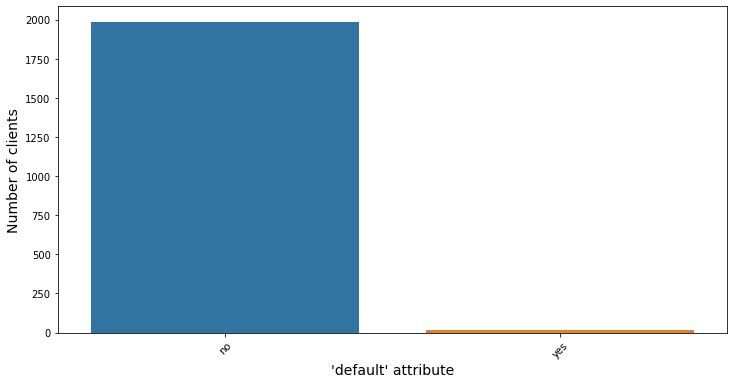

no     1985
yes      15

Most common category within 'default' attribute: no



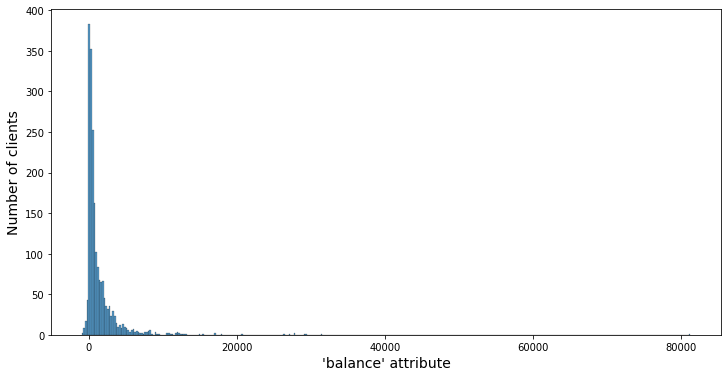

Mean of 'balance' attribute:   1413.6635
Median of 'balance' attribute: 551.0



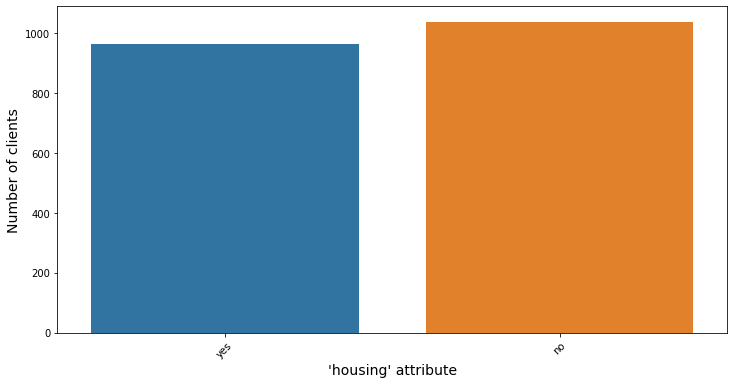

no     1037
yes     963

Most common category within 'housing' attribute: no



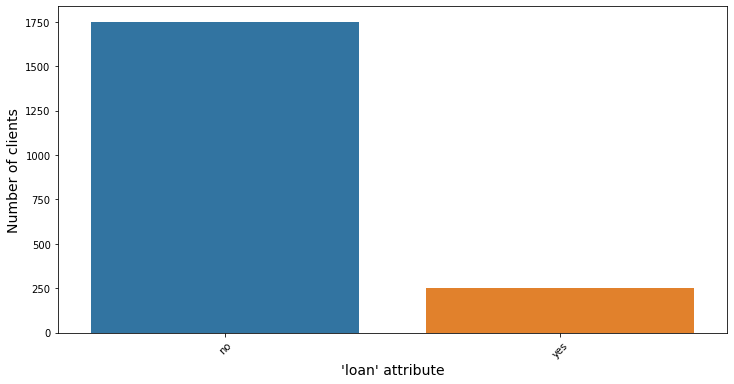

no     1750
yes     250

Most common category within 'loan' attribute: no



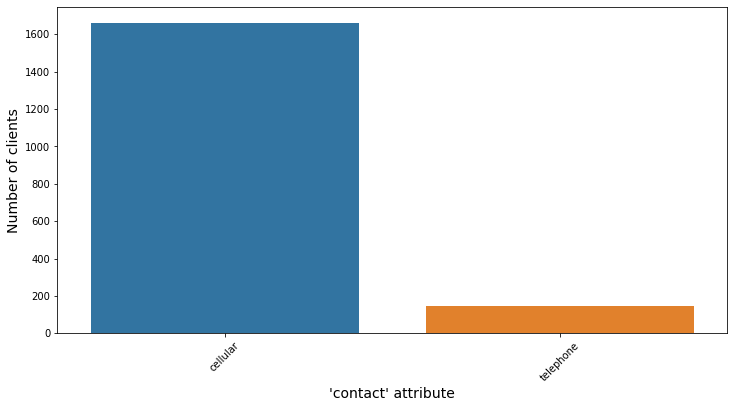

cellular     1663
telephone     146

Most common category within 'contact' attribute: cellular



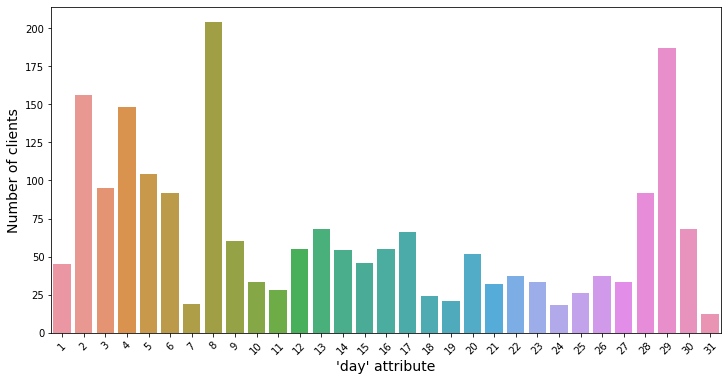

8     204
29    187
2     156
4     148
5     104
3      95
28     92
6      92
13     68
30     68
17     66
9      60
16     55
12     55
14     54
20     52
15     46
1      45
26     37
22     37
27     33
10     33
23     33
21     32
11     28
25     26
18     24
19     21
7      19
24     18
31     12

Most common category within 'day' attribute: 8



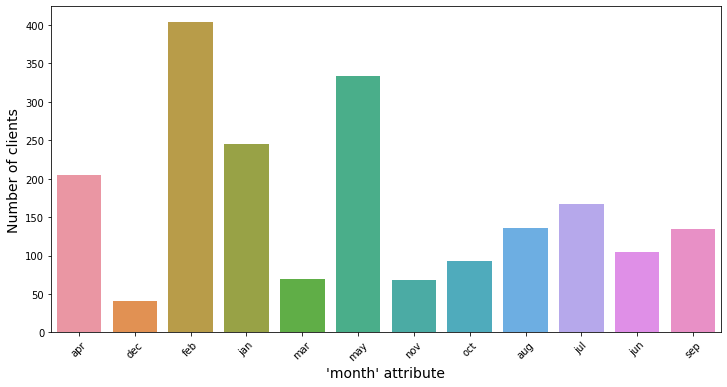

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41

Most common category within 'month' attribute: feb



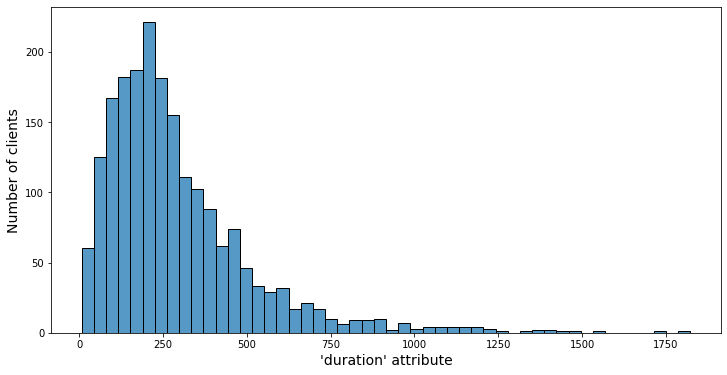

Mean of 'duration' attribute:   292.0205
Median of 'duration' attribute: 236.0



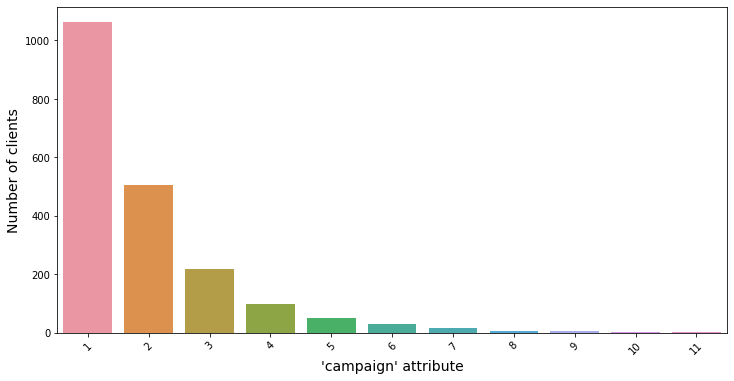

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1

Most common category within 'campaign' attribute: 1



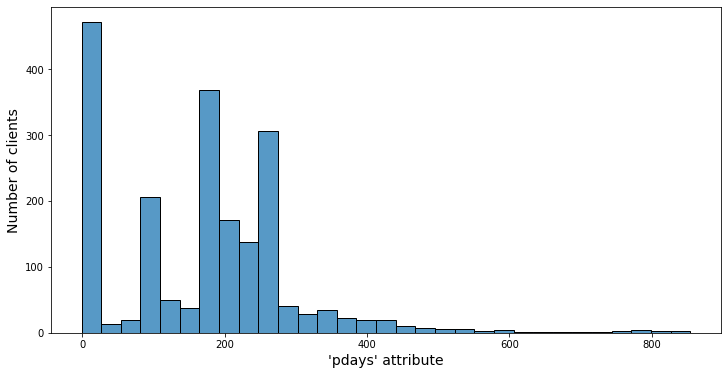

Mean of 'pdays' attribute:   167.896
Median of 'pdays' attribute: 182.0



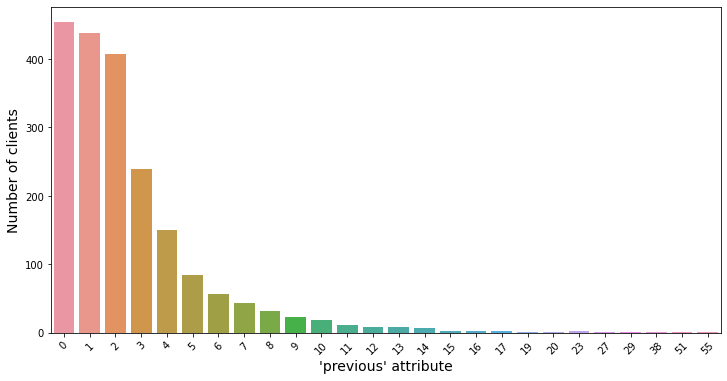

0     454
1     438
2     407
3     240
4     150
5      85
6      57
7      44
8      32
9      23
10     19
11     12
12      9
13      8
14      7
23      2
15      2
16      2
17      2
27      1
38      1
29      1
51      1
20      1
55      1
19      1

Most common category within 'previous' attribute: 0



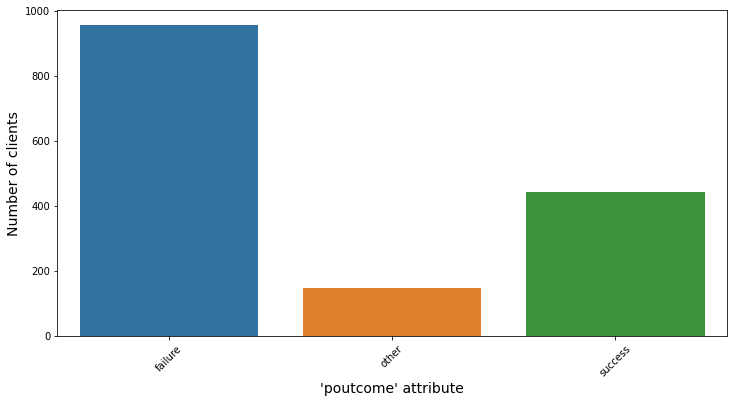

failure    955
success    444
other      147

Most common category within 'poutcome' attribute: failure



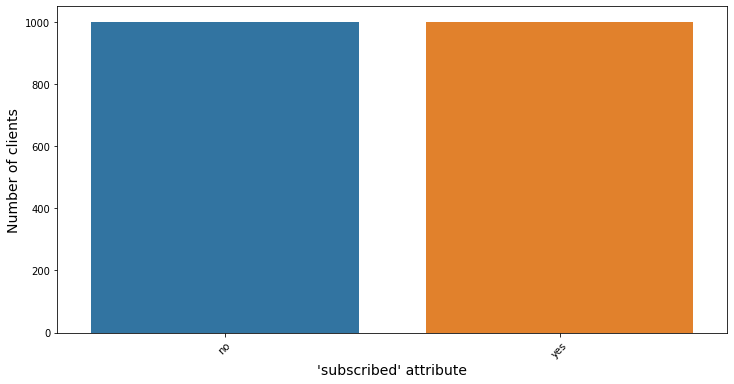

no     1000
yes    1000

Most common category within 'subscribed' attribute: no



In [22]:
for column in df:
    if df[column].dtype != 'object' and df[column].name != 'day' and \
                                        df[column].name != 'campaign' and df[column].name != 'previous':
        sns.histplot(data=df, x=df[column], bins='auto')
        plt.rcParams["axes.labelsize"] = 14
        plt.xlabel('\'' + df[column].name + '\' attribute')
        plt.ylabel('Number of clients')
        plt.show()
        print('Mean of \''
              + df[column].name + '\' attribute:   ' + str(df[column].mean()))
        print('Median of \''
              + df[column].name + '\' attribute: ' + str(df[column].median()) + '\n')
    else:
        sns.countplot(x=column, data=df)
        plt.xticks(rotation = 45)
        plt.xlabel('\'' + df[column].name + '\' attribute')
        plt.ylabel('Number of clients')
        plt.show()
        print(df[column].value_counts().to_string() + '\n')
        print('Most common category within \'' 
              + df[column].name + '\' attribute: ' + str(df[column].value_counts().idxmax()) + '\n')

### Insight gleaned from overview:

**age**

The mean and median age of the clients are both close to 40, which is around halfway into most people's working lives. &ensp; In terms of making a decision about an investment, this is an age when the client is likely to be working for long enough to have a reasonable understanding of how to invest their money, yet far enough from potential retirement to have the time to wait for an investment to run its course.

**job**

Some of the most common jobs among the clients are management, technician, blue-collar, and administrative. &ensp; These would be considered fairly stable positions. &ensp; Less common are retired, student, unemployed, self-employed, entrepreneur, and housemaid. &ensp; Of these, student, unemployed, and housemaid would not generally be considered high-earning.

**marital**

A little over half of the clients are married, around a third are singled, and around a tenth are divorced.

**education**

The education level of the clients coincidentally aligns quite well with the marital status, with around half having secondary level education, around a third having third level education, and around a tenth just having primary level education.

**default** 

Almost none of the clients are in default &mdash; only 15 in the entire dataset.

**balance**

The mean account balance is around 1400, but the median is quite a bit lower at around 550. &ensp; This indicates a positive skew, which is common with finance themed attributes due to wealthy outliers. &ensp; There looks to possibly one outlier here that while it doesn't necessarily skew the statistics, it does hinder visualisation of the attribute as one value causes all of the other values to be squeezed together. &ensp; This will be rectified in the next section.

**housing**

There is roughly a 50/50 split as to whether or not the client has a housing loan (mortgage).

**loan**

Only an eighth of the clients have personal loans.

**contact**

Less than a tenth of the clients were contacted on a traditional *landline* phone, with the rest contacted on a cellular (mobile).

**day**

This was an interesting one. &ensp; First, the 31st can be omitted here to some degree, as it doesn't occur with the same frequency as the other days. &ensp; There is a very clear skew towards the beginning and end of the month when calls were made. &ensp; At a guess, I reckon it may be perceived that clients are more likely to agree to a term deposit early in the month as it is a very human thing to have a fresh sense of ambition at the beginning of a new month. &ensp; Additionally, monthly-paid workers are most often paid near the end of the month, and so are potentially more cash-flush in the early days of a new month. &ensp; Both of these observations are just based on personal experience.

**month**

This is also an intersting one, though I have to stretch a little further to make sense of it! &ensp; For the most part, it follows roughly the flow of the year, with calls starting the year strong and tailing off towards the end of the year, with some interesting big exceptions. &ensp; It seems natural that the bank's strategies are largely a yearly thing, and so would start in a new year with big enthusiasm before tailing off at the end of the year, either when yearly targets are met and/or the bank has turned their focus towards the following year. &ensp; The end of the year is also a time when due to the onset of winter, clients' moods may be sagging and would be perceived to be less likely to be receptive to a telemarketing call. &ensp; Also, due to Christmas, clients would have other priorities with their finances.

March is a big exception here, being the third least common month for a call. &ensp; I don't know an obvious reason for this. &ensp; Maybe there's an intuitive reason for this that a Portuguese person might understand or maybe this specific bank does audits or some other internal activity during this month, but if I had to make an uninformed guess, maybe the telemarketing staff lose their initial burst of momentum into the campaign around this point before regathering themselves.

May being the second most common month is possibly due to the onset of summer, with clients perceived to be in a better mood.

**duration**

The majority of the calls were around five minutes, though this attribute is biased as a predictor so we won't look into it too much.

**campaign**

The number of calls to each client has a very clear exponential distribution, with around half the clients receiving once call, a quarter receiving two calls, and so on.

**pdays**

The mean and median number of days between the current campaign's call to the client and the last call from the previous campaign is approximately half a year.

**previous**

The number of calls to the client before this campaign was fairly evenly split between one, two, and three, with around 60% of the clients in one of those categories before there's an exponential tail-off through greater numbers of calls.

**poutcome**

Roughly half of the clients were successfully persuaded by the previous campaign and a little under a quarter were not persuaded. &ensp; Around 150 were classified as *other*, whatever that means. &ensp; Perhaps they agreed to the terms of whatever it was but then withdrew shortly after. &ensp; Who knows! &ensp; Regardless, around half of the clients being persuaded surely amounts to a successful campaign on the part of the bank.

### Rectifying outlier in balance attribute

As bank balance looks to have an outlier, it's worth having a closer look to see what's going on and to consider rectifying things.

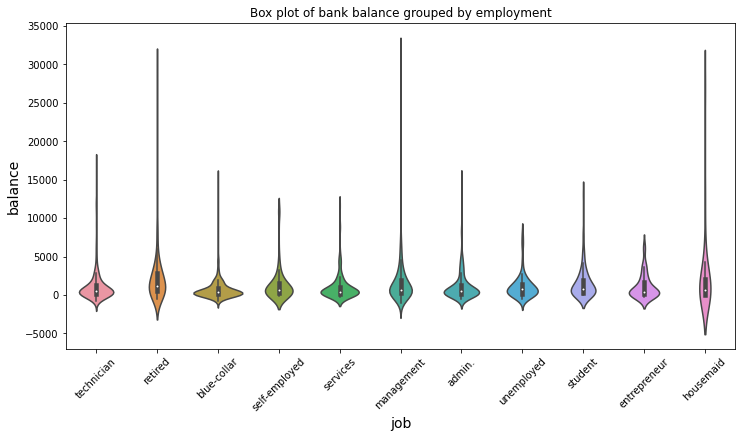

In [27]:
sns.violinplot(data=df, x='job', y='balance')
plt.rcParams["figure.figsize"]=12,6
plt.title('Box plot of bank balance grouped by employment')
plt.suptitle("")
plt.xticks(rotation = 45)
plt.show()

These results look fairly reasonable without too may surprises. &ensp; Management encompasses quite a wide range of positions, from managing a small corner shop to managing a division within a large multinational. &ensp; It is unsurprising that many poeple with such a title would earn considerably more than the mean for people with that title. &ensp; The few outliers who are retired too make sense, as such people could have had a very lucrative profession before retiring.

One outlier stands out though and can't be ignored. &ensp; A housemaid wouldn't ordinarily be known for being a high earning profession, but one particular housemaid in this dataset has a comparatively high bank balance. &ensp; It's definitely worth having a peek at them next.

In [28]:
#df.loc[[df.loc[df['job'] == 'housemaid', 'balance'].idxmax()]]
df.loc[df.loc[df['job'] == 'housemaid', 'balance'].idxmax()]

age                31.0
job           housemaid
marital          single
education       primary
default              no
balance           26965
housing              no
loan                 no
contact        cellular
day                  21
month               apr
duration            654
campaign              2
pdays                -1
previous              0
poutcome            NaN
subscribed          yes
Name: 1106, dtype: object

It's hard to know if there's anything strange here or not. &ensp; Perhaps this is a housemaid for a very wealthy client who pays their staff very well. &ensp; The values for *pdays* and *poutcome* are not values that are defined for these attributes so there's always a possibility that this particular entry was entered incorrectly.

Anyway, the huge outlier with a balance of around 80K is now removed so as to make future visualisation somewhat nicer, without really affecting the statistics.

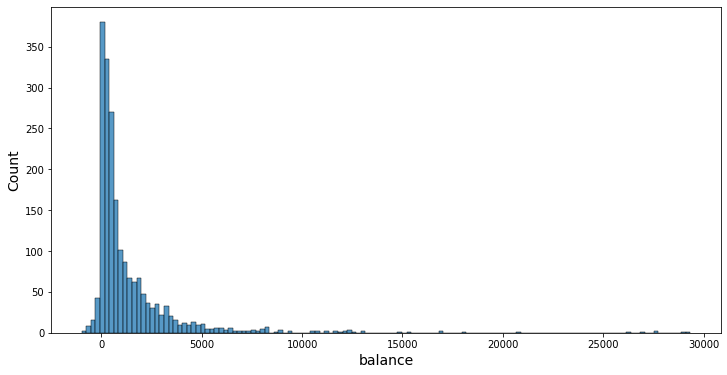

In [29]:
df.drop(df['balance'].idxmax(), inplace=True)

sns.histplot(data=df, x=df['balance'], bins='auto')
plt.show()

There are still some relative outliers here, but they are all less than half the size of the one removed.

## Individual attribute's influence on subscription

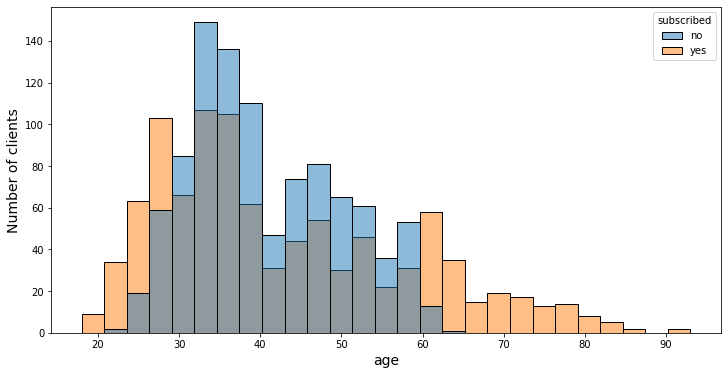

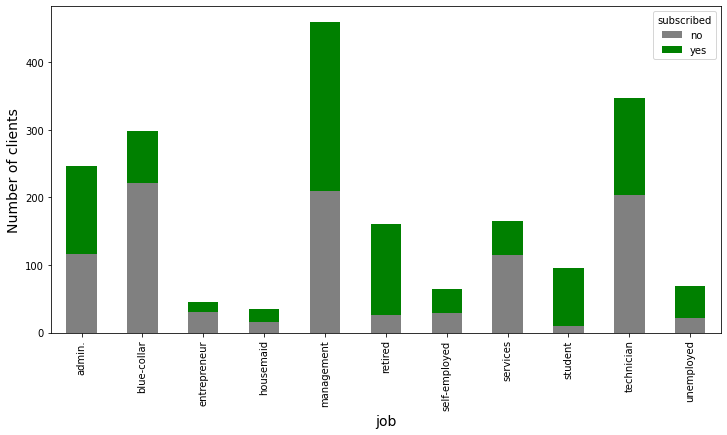

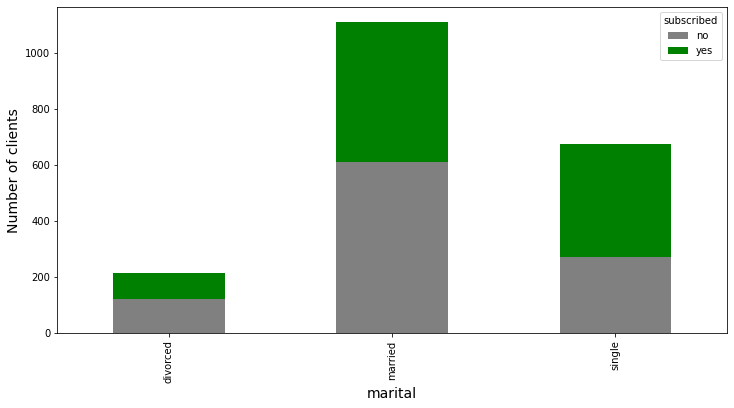

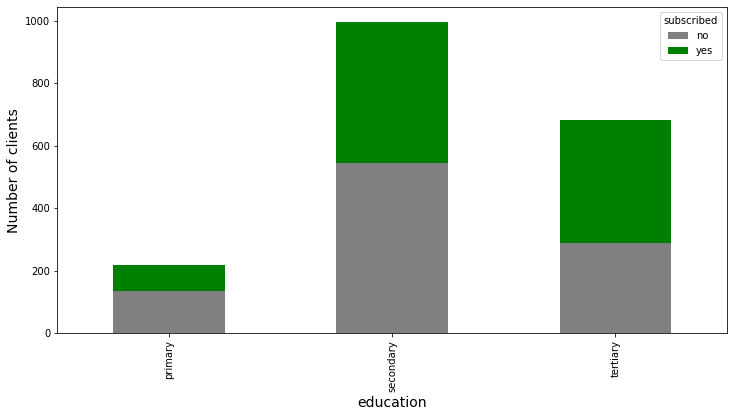

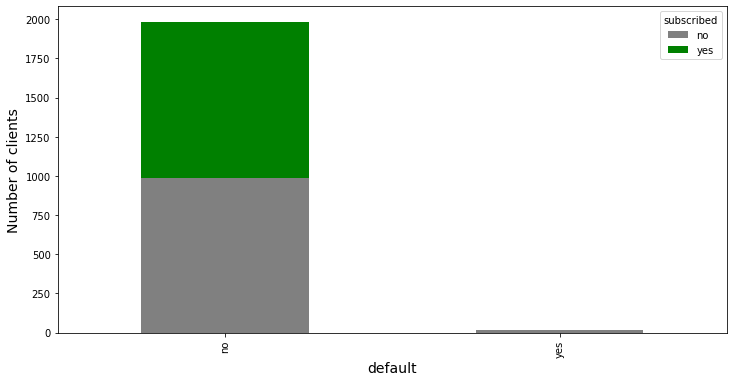

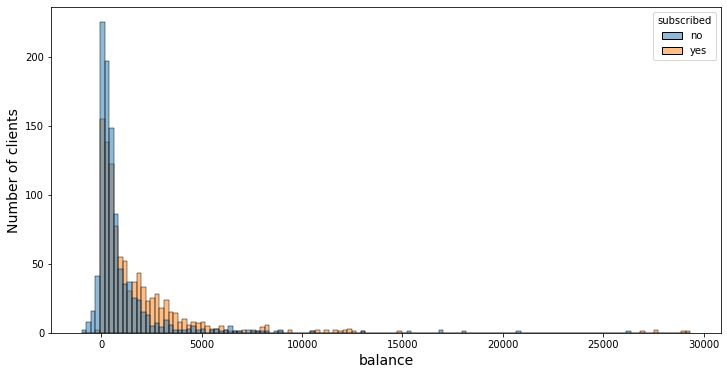

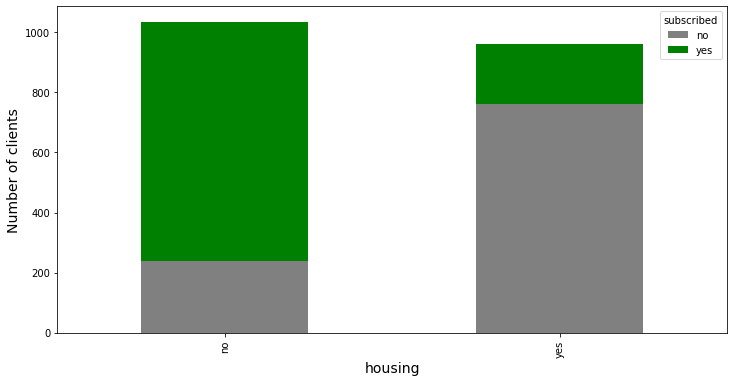

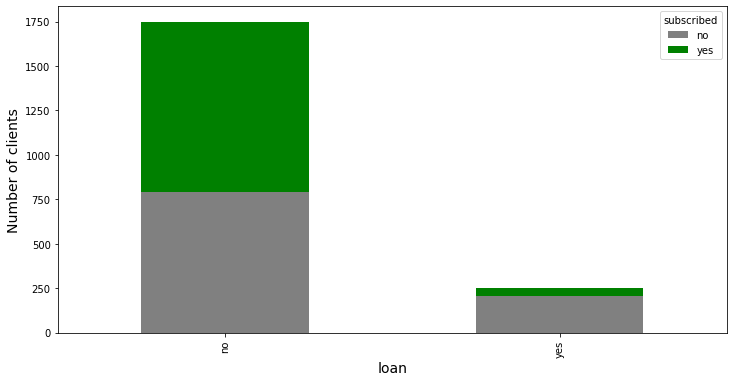

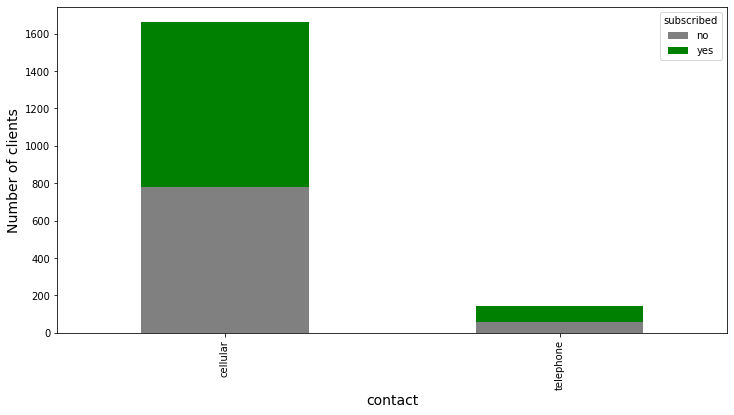

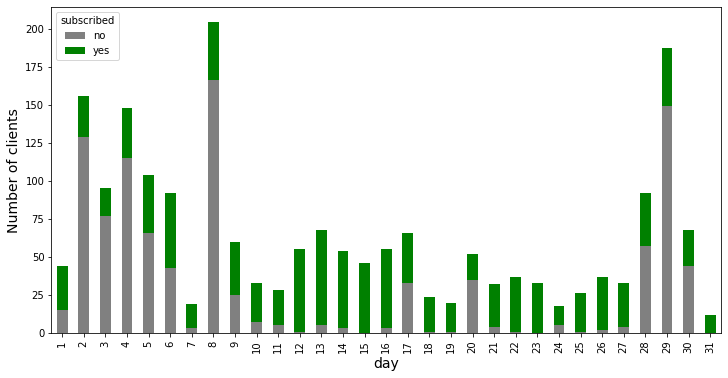

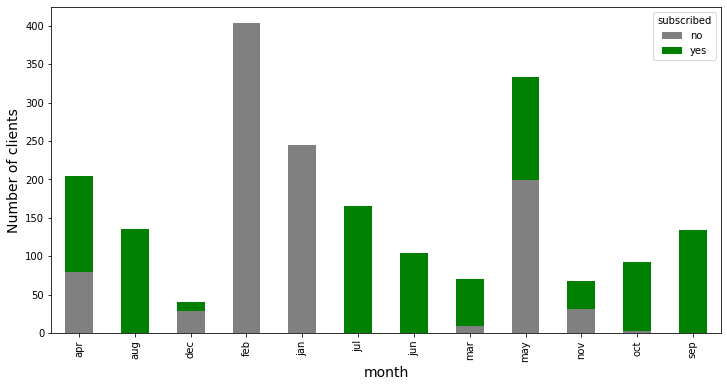

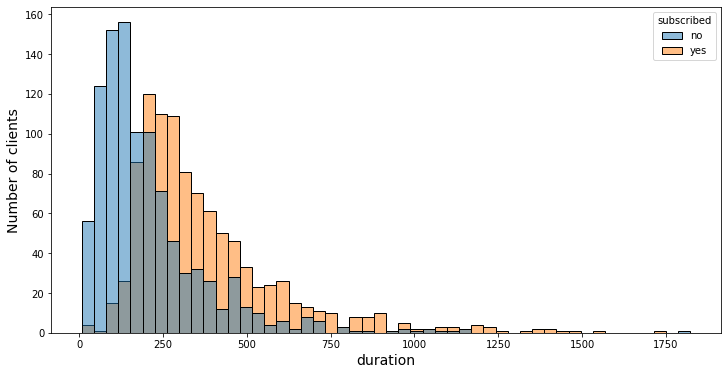

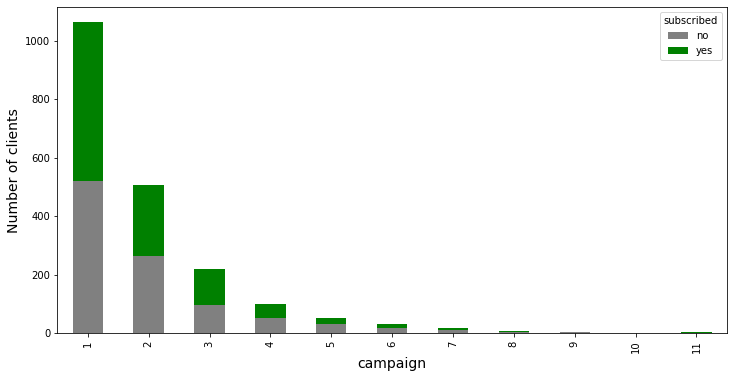

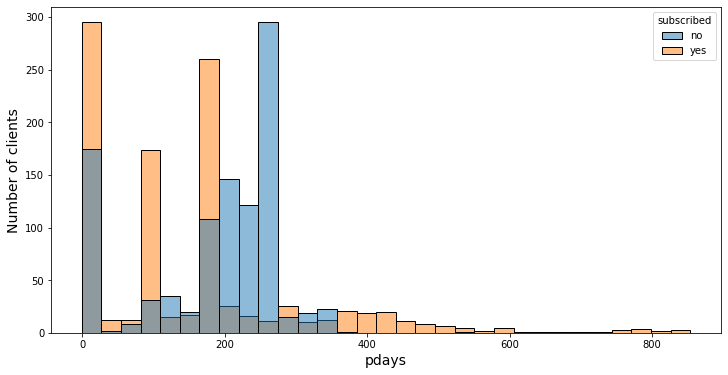

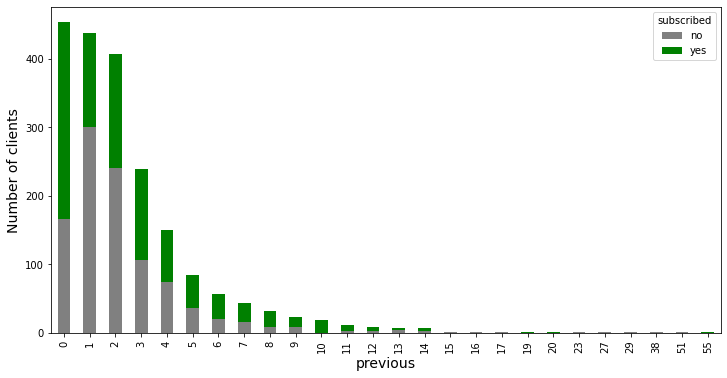

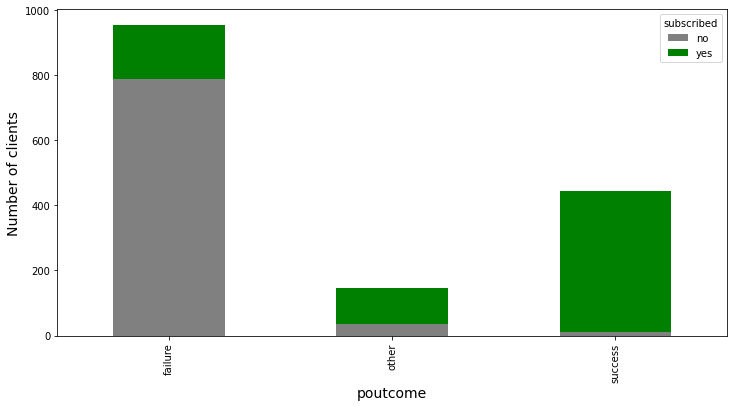

In [30]:
for column in df:
    if df[column].name == 'duration': pass
    if df[column].dtype != 'object' and df[column].name != 'day' and \
                                        df[column].name != 'campaign' and \
                                        df[column].name != 'previous':
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #sns.boxplot(data=df, x='subscribed', y=df[column].name, ax=ax1)
        #sns.violinplot(data=df, x='subscribed', y=df[column].name, ax=ax2)
        #plt.tight_layout()
        sns.histplot(data=df, x=df[column].name, hue='subscribed', bins='auto', color=['g', 'b'])
    elif df[column].name == 'subscribed':
        break
    else:
        plt.rcParams["axes.labelsize"] = 14
        crosstab_CL = pd.crosstab(df[column], df['subscribed'])
        crosstab_CL.plot(kind='bar', stacked=True, color=['grey', 'green'])
    plt.ylabel('Number of clients')
    plt.show()

### Insight gleaned from individual attributes' effect on subscription:

**age**

Clients between the age of 30 and 60 tended not to subscribe, while clients outside of this range tended to subscribe.

**job**

Blue-collar workers, service workers, and entrepreneurs are unlikely to subscribe. &ensp; Students, retired people, and unemployed people are more likely to subscribe. &ensp; Other types of workers seemed equally likely to go either way.

**marital**

Single people seemed more likely to subscribe, while divorced and married people seemed less likely. &ensp; This isn't a very decisive attribute on its own though.

**education**

Those with primary education didn't tend to subscribe, though education on it's own doesn't swing the results hugely one way or another.

**default** 

Very few clients in the dataset are in default, and this attribute on its own was fairly unimpactful.

**balance**

Clients with a balance less than around 1000 tended not to subscribe. &ensp; It is likely there was a minimum amount needed for the term deposit, so perhaps this attribute is biased as a predictor.

**housing**

Clients without a mortgage were much more likely to subscribe. &ensp; Clients with one were much less likely.  This makes intuitive sense, as having a mortgage or not has a big impact on cash fluidity.

**loan**

Clients without a loan were slightly more likely to subscribe, while those without one were quite unlikely to.

**contact**

Contact type on its own has little impact on subscription likeliness.

**day**

Clients contacted at the start or very end of the month were less likely to subscribe, while at other times they were more likely. &ensp; This is hard to explain!

**month**

Clients were overwhelmingly more likely to subscribe during summer and autumn and quite likely during springtime, while overwhelmingly unlikely during winter. &ensp; Very interesting.

**duration**

Duration is being omitted from this analysis as it's a biased predictor.

**campaign**

As the number of calls to each client increased, they were more likely to say no. &ensp; This makes sense, as they were probably truly not interested.

**pdays**

This was interesting. &ensp; It seemed that calling a client again within 100 days or after a year made it more likely they're subscribe.

**previous**

As the number of calls to each client increased on the previous campaign, they were more likely to say yes.

**poutcome**

If the previous campaign didn't convince the client, they didn't subscribe to this one either, and vice-versa.

## Drawing conclusions

A client's job seemed to be pretty good indicator of whether they'd subscribe or not, as did the time of year they were contacted. &ensp; Seeing how both of these cross-combined with each other affects the client's likelihood to subscribe seems a good idea.

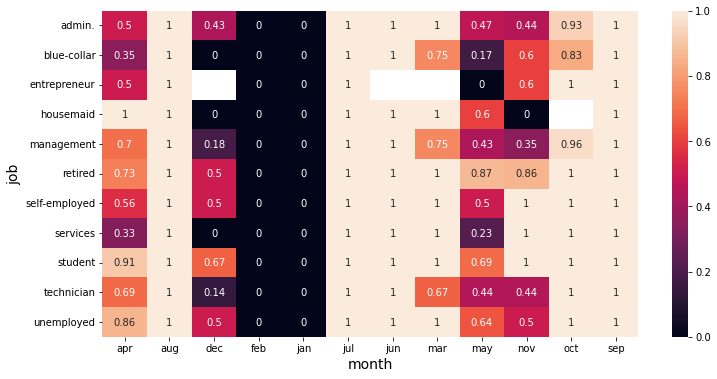

In [31]:
pivot_table_J_E = df.pivot_table(values='subscribed', 
                           index='job', 
                           columns='month',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_J_E, annot=True)
plt.show()

Looking at the above heat map, the month of contact with the client has an enormous impact, and combining it with the client's job type adds additional certainty one way or other.

## A little detour

Another question to ask about this dataset is:

*How long is a client expected to remain on a call for?*

(It's the case that I spent the first evening working on this e-tivity poking around with this, so I felt it was worth leaving it in the final submission)

It is the case that in the context of predictive modelling, this attribute is not a useful one. &ensp; The reason for this is because the call duration is not something that is known ahead of ... the call itself!

The mean call duration between different occupation categories is assessed just to see if there's anything interesing to be found. &ensp; I feel that the vast majority of people don't like being cold-called for telemarketing purposes, and given that these calls have the objective of persuading a person to invest their money, it seems like an interesing thing to look into.

First, a look at how call duration varies by job type.

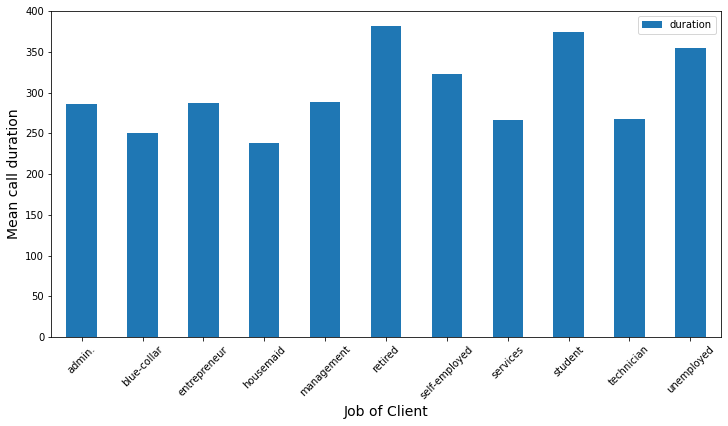

In [32]:
df.groupby(['job']).agg({'duration':'mean'}).plot.bar()
plt.rcParams["figure.figsize"]=12,6
plt.xlabel('Job of Client')
plt.ylabel('Mean call duration')
plt.xticks(rotation = 45)
plt.show()

This seems reasonable. &ensp; Retired and unemployed people may have more time on their hands to stay longer on a call. &ensp; Students, while not as time-rich, may also not exactly be cash-rich, and so perhaps they feel that entertaining the call may put them in a better position for a loan at a later date!

A similar comparison is now done based on the education level of clients.

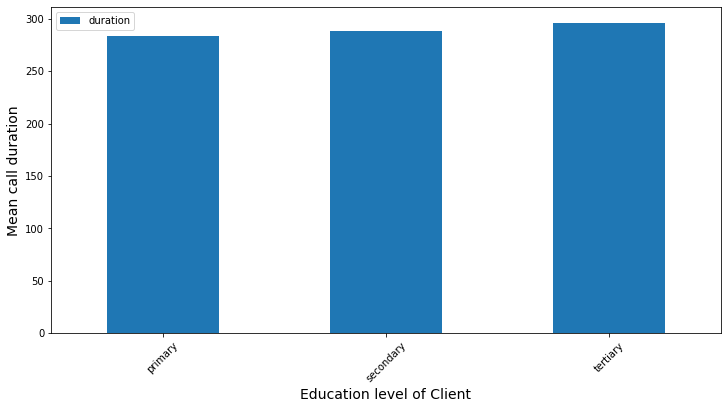

In [33]:
df.groupby(['education']).agg({'duration':'mean'}).plot.bar()
plt.rcParams["figure.figsize"]=6,4
plt.xlabel('Education level of Client')
plt.ylabel('Mean call duration')
plt.xticks(rotation = 45)
plt.show()

The level of education of the client on its own appears to have a neglibible effect on the call duration.

Next, it's worth seeing how call duration varies as clients take repeated calls.

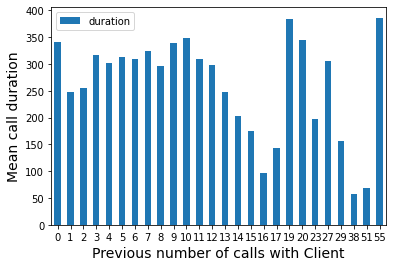

In [34]:
df.groupby(['previous']).agg({'duration':'mean'}).plot.bar()
plt.rcParams["figure.figsize"]=12,6
plt.xlabel('Previous number of calls with Client')
plt.ylabel('Mean call duration')
plt.xticks(rotation = 0)
plt.show()

The drop off here beyond ten calls seems plausible, in that people may not be expected to entertain a call for long after receiving so many. &ensp; Most of columns beyond this seem bizarre, and so it's worth seeing if these are just mean values for a single count.

In [35]:
df['previous'].value_counts()

0     453
1     438
2     407
3     239
4     150
5      85
6      57
7      44
8      32
9      23
10     19
11     12
12      9
13      8
14      7
23      2
15      2
16      2
17      2
27      1
38      1
29      1
51      1
20      1
55      1
19      1
Name: previous, dtype: int64

This is as expected. &ensp; The bizarrely long call duration means are not meaningful insight into the wider dataset and are instead outliers &mdash; individual folks who are happy to take long calls! &ensp; Given that there are only a handful of these *outlier*, it's worth displaying them all together to see if anything stands out.

In [36]:
df.loc[df['previous'] > 14] # on this particular dataset, 14 very much delineates things

age          job   marital  education default  balance housing loan  \
97    40.0       admin.    single  secondary      no      782     yes   no   
238   29.0     services   married  secondary      no      222     yes   no   
417   44.0   management   married   tertiary      no     1451     yes   no   
545   57.0  blue-collar   married  secondary      no      297      no  yes   
596   30.0   management    single   tertiary      no     1422     yes  yes   
673   49.0   management    single   tertiary      no      145     yes   no   
697   31.0   technician   married   tertiary      no      702      no  yes   
755   31.0   management    single   tertiary      no      358     yes   no   
992   35.0   technician  divorced   tertiary      no     1718     yes  yes   
1138  34.0   management    single   tertiary      no      417     yes   no   
1146  77.0      retired   married    primary      no     2590      no   no   
1150  34.0   management    single   tertiary      no      275      no   no   
1275  37.0   technician   married  secondary      no      432     yes   no   
1322  36.0   technician  divorced  secondary      no     1451     yes   no   
1465  39.0   technician    single  secondary      no     1435      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
97     cellular   21   dec        94         5    202        17  failure   
238    cellular    3   feb       197         1    250        23  failure   
417    cellular    5   feb        80         7     80        15  failure   
545   telephone   28   jan       120         2    154        16  failure   
596    cellular   29   jan       305         1    223        27  failure   
673    cellular   29   jan        57         2    248        38  failure   
697    cellular   29   jan       157         3    182        29  failure   
755    cellular   30   jan        68         3    256        51  failure   
992    cellular   17   nov        74         1    167        16    other   
1138   cellular    5   aug       270         1    174        15  failure   
1146  telephone   12   aug       345         1    178        20  failure   
1150   cellular    2   aug       196         2    455        23    other   
1275   cellular    6   jul       386         3    776        55  failure   
1322   cellular   23   jul       192         4     93        17    other   
1465   cellular   17   jun       383         1    296        19    other   

     subscribed  
97           no  
238          no  
417          no  
545          no  
596          no  
673          no  
697          no  
755          no  
992          no  
1138        yes  
1146        yes  
1150        yes  
1275        yes  
1322        yes  
1465        yes

So far, nothing looks too much out of the ordinary here.

---